In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import norm
from scipy.optimize import minimize
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

In [28]:
f8_inputs = np.load("initial_inputs.npy")
f8_outputs = np.load("initial_outputs.npy")
f8_inputs_2 = np.load("initial_inputs2.npy")
f8_outputs_2 = np.load("initial_outputs2.npy")

In [29]:
f8_inputs = np.concatenate((f8_inputs, f8_inputs_2)) 
f8_inputs = np.concatenate((f8_inputs, np.array([[0.084259,0.384768,0.152956,0.83177,0.619797,0.838113,0.360231,0.819888]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.265797,0.781385,0.799061,0.737909,0.541671,0.059651,0.661726,0.249156]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.085447,0.080955,0.045928,0.041786,0.373935,0.831055,0.468307,0.923084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.010576,0.090955,0.105928,0.061786,0.353935,0.891055,0.478307,0.943084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.065447,0.080955,0.055928,0.051786,0.383935,0.841055,0.478307,0.913084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.035447,0.080955,0.045928,0.041786,0.373935,0.831055,0.468307,0.923084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.040447,0.080955,0.045928,0.041786,0.373935,0.831055,0.468307,0.923084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.015447,0.080955,0.080928,0.041786,0.373935,0.866055,0.468307,0.923084]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.154598,0.138109,0.018722,0.059536,0.367817,0.883297,0.437297,0.865776]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.525834,0.680905,0.197024,0.703188,0.541326,0.930864,0.505922,0.13963]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.151301,0.185001,0.182801,0.197001,0.631301,0.538201,0.257201,0.594101]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.150301,0.194801,0.185401,0.194301,0.601801,0.534401,0.269901,0.604701]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.144501,0.190901,0.128601,0.104101,0.187601,0.654601,0.501901,0.841001]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.147401,0.209901,0.130901,0.128401,0.191901,0.630201,0.487101,0.802801]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.151301,0.085001,0.182801,0.197001,0.731301,0.538201,0.257201,0.394101]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.251301,0.185001,0.182801,0.297001,0.831301,0.538201,0.257201,0.494101]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.351301,0.285001,0.382801,0.397001,0.631301,0.538201,0.457201,0.494101]])))
f8_inputs = np.concatenate((f8_inputs, np.array([[0.251301,0.185001,0.182801,0.197001,0.731301,0.538201,0.357201,0.494101]])))

f8_outputs = np.concatenate((f8_outputs,f8_outputs_2)) 
f8_outputs = np.append(f8_outputs,9.2912571799561)
f8_outputs = np.append(f8_outputs,7.1918457066059)
f8_outputs = np.append(f8_outputs,9.6071159102679)
f8_outputs = np.append(f8_outputs,9.5519090503339)
f8_outputs = np.append(f8_outputs,9.5991537082679)
f8_outputs = np.append(f8_outputs,9.5992053102679)
f8_outputs = np.append(f8_outputs,9.6004463702679)
f8_outputs = np.append(f8_outputs,9.5828223402679)
f8_outputs = np.append(f8_outputs,9.5885735221739)
f8_outputs = np.append(f8_outputs,8.608506577299)
f8_outputs = np.append(f8_outputs,9.9607020326694)
f8_outputs = np.append(f8_outputs,9.9511627380494)
f8_outputs = np.append(f8_outputs,9.5927395277894)
f8_outputs = np.append(f8_outputs,9.6206379181294)
f8_outputs = np.append(f8_outputs,9.9653361726694)
f8_outputs = np.append(f8_outputs,9.9134032526694)
f8_outputs = np.append(f8_outputs,9.4536206526694)
f8_outputs = np.append(f8_outputs,9.8880531526694)


In [30]:
X_max= f8_inputs[np.argmax(abs(f8_outputs))]
print(X_max)

[0.151301 0.085001 0.182801 0.197001 0.731301 0.538201 0.257201 0.394101]


In [31]:
Y_max= f8_outputs[np.argmax(abs(f8_outputs))]
print(Y_max)

9.9653361726694


In [21]:
def costly_function(x):
    total = np.array([])
    for x_i in x:
         total = np.append(total, np.sum(np.exp(-(x_i - 5) ** 2)))
    
    return total  + np.random.randn()

In [22]:
class BayesianOptimizer():
      
    def __init__(self, target_func, x_init, y_init, n_iter, scale, batch_size,noise_assumption,rbf_lengthscale):
        self.x_init = x_init
        self.y_init = y_init
        self.target_func = target_func
        self.n_iter = n_iter
        self.scale = scale
        self.batch_size = batch_size        
        self.noise_assumption = noise_assumption
        self.rbf_lengthscale = rbf_lengthscale
        kernel = RBF(length_scale=self.rbf_lengthscale, length_scale_bounds=(1,99))
        self.gauss_pr = GaussianProcessRegressor( kernel = kernel, alpha=self.noise_assumption)
        self.best_samples_ = pd.DataFrame(columns = ['x', 'y', 'ei'])
        self.distances_ = []
        
    def _get_expected_improvement(self, x_new):

        # Using estimate from Gaussian surrogate instead of actual function for 
        # a new trial data point to avoid cost 
 
        mean_y_new, sigma_y_new = self.gauss_pr.predict(np.array([x_new]), return_std=True)
        sigma_y_new = sigma_y_new.reshape(-1,1)
        if sigma_y_new == 0.0:
            return 0.0
        
        # Using estimates from Gaussian surrogate instead of actual function for 
        # entire prior distribution to avoid cost
        
        mean_y = self.gauss_pr.predict(self.x_init)
        max_mean_y = np.max(mean_y)
        z = (mean_y_new - max_mean_y) / sigma_y_new
        exp_imp = (mean_y_new - max_mean_y) * norm.cdf(z) + sigma_y_new * norm.pdf(z)
        
        return exp_imp
    def _acquisition_function(self, x):
        return -self._get_expected_improvement(x)
    
    def _get_next_probable_point(self):
            min_ei = float(sys.maxsize)
            x_optimal = None 
            
            # Trial with an array of random data points
            
            for x_start in np.random.uniform(low=0.1, high=0.99, size=(1,8)):
                response = minimize(fun=self._acquisition_function, x0=x_start, method='L-BFGS-B')
                if response.fun < min_ei:
                    min_ei = response.fun
                    x_optimal = response.x
            
            return x_optimal, min_ei
    def _extend_prior_with_posterior_data(self, x,y):
        self.x_init = np.append(self.x_init, np.array([x]), axis = 0)
        self.y_init = np.append(self.y_init, np.array(y), axis = 0)
        
    def optimize(self):
        y_max_ind = np.argmax(self.y_init)
        y_max = self.y_init[y_max_ind]
        optimal_x = self.x_init[y_max_ind]
        optimal_ei = None
        for i in range(self.n_iter):
            self.gauss_pr.fit(self.x_init, self.y_init)
            x_next, ei = self._get_next_probable_point()
            y_next = self.target_func(np.array([x_next]))
            self._extend_prior_with_posterior_data(x_next,y_next)
            
            if y_next[0] > y_max:
                y_max = y_next[0]
                optimal_x = x_next
                optimal_ei = ei

            if i == 0:
                 prev_x = x_next
            else:
                self.distances_.append(np.linalg.norm(prev_x - x_next))
                prev_x = x_next
            tmpdf = pd.DataFrame({"y": y_max, "ei": optimal_ei},index=[1])
            #self.best_samples_ = self.best_samples_.append({"y": y_max, "ei": optimal_ei},ignore_index=True)
            self.best_samples_ =pd.concat([self.best_samples_ ,tmpdf],ignore_index = True)
        
        return optimal_x, y_max
  
  
        

In [23]:
sample_x = f8_inputs
sample_y = f8_outputs

In [45]:
bopt = BayesianOptimizer(target_func=costly_function, x_init=sample_x, y_init=sample_y, n_iter=200, scale=10, batch_size=35,noise_assumption =10,rbf_lengthscale=10)
bopt.optimize()

C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\

C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\

C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\

C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 99. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kamran\

(array([0.04343225, 0.10004702, 0.22342261, 0.01686426, 0.28000728,
        0.36384718, 0.32840638, 0.83239639]),
 9.755085388342168)

In [ ]:


(array([0.04343225, 0.10004702, 0.22342261, 0.01686426, 0.28000728,
        0.36384718, 0.32840638, 0.83239639]),9.755085388342168)


9.5991537082679
(array([0.065447, 0.080955, 0.055928, 0.051786, 0.383935, 0.841055,
        0.478307, 0.913084]),
 9.5991537082679)

[0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544,
        0.80105533, 0.48830701, 0.89308498]

In [24]:
f8_inputs

array([[0.60499445, 0.29221502, 0.90845275, ..., 0.57533801, 0.31031095,
        0.73428138],
       [0.17800696, 0.56622265, 0.99486184, ..., 0.70790879, 0.63538449,
        0.10713163],
       [0.00907698, 0.81162615, 0.52052036, ..., 0.09165169, 0.59241515,
        0.36732026],
       ...,
       [0.147401  , 0.209901  , 0.130901  , ..., 0.630201  , 0.487101  ,
        0.802801  ],
       [0.151301  , 0.085001  , 0.182801  , ..., 0.538201  , 0.257201  ,
        0.394101  ],
       [0.251301  , 0.185001  , 0.182801  , ..., 0.538201  , 0.257201  ,
        0.494101  ]])

In [25]:
f8_outputs

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525,
       7.38153659, 6.21406582, 8.34373778, 8.20235493, 7.0175736 ,
       8.15436185, 8.59988062, 7.41496438, 6.35307753, 7.04891614,
       8.83964993, 9.75508539, 9.069804  , 8.33091139, 9.08235861,
       9.06259425, 7.88211016, 6.8055637 , 9.22168616, 8.57638926,
       6.45101025, 8.95855365, 8.30868114, 9.23898119, 7.41316123,
       8.28986748, 8.14792352, 6.56627417, 8.64815107, 8.10407818,
       8.67513919, 8.73943795, 7.55172428, 8.25528511, 6.61336

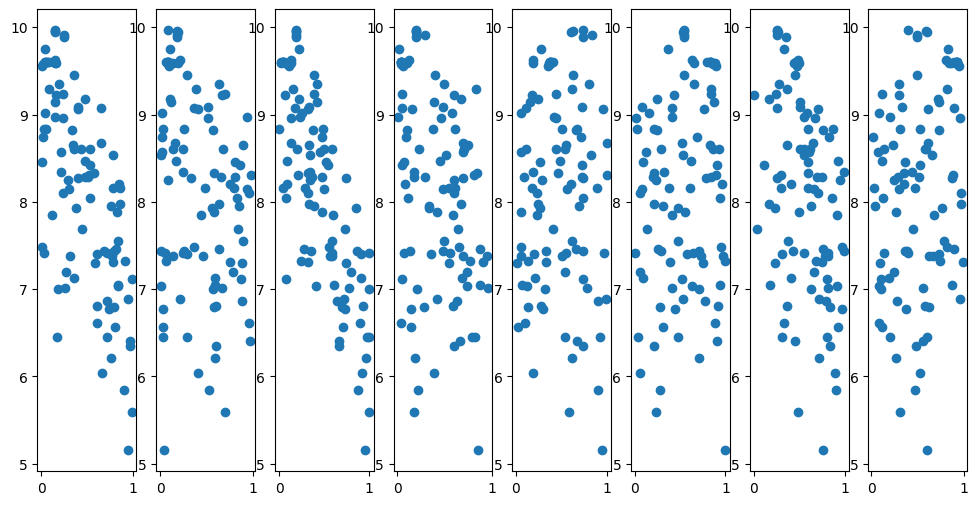

In [11]:
fig, ax = plt.subplots(1,8,figsize = (12,6))
ax[0].scatter(f8_inputs[:,0],f8_outputs)
ax[1].scatter(f8_inputs[:,1],f8_outputs)
ax[2].scatter(f8_inputs[:,2],f8_outputs)
ax[3].scatter(f8_inputs[:,3],f8_outputs)
ax[4].scatter(f8_inputs[:,4],f8_outputs)
ax[5].scatter(f8_inputs[:,5],f8_outputs)
ax[6].scatter(f8_inputs[:,6],f8_outputs)
ax[7].scatter(f8_inputs[:,7],f8_outputs)

plt.show()

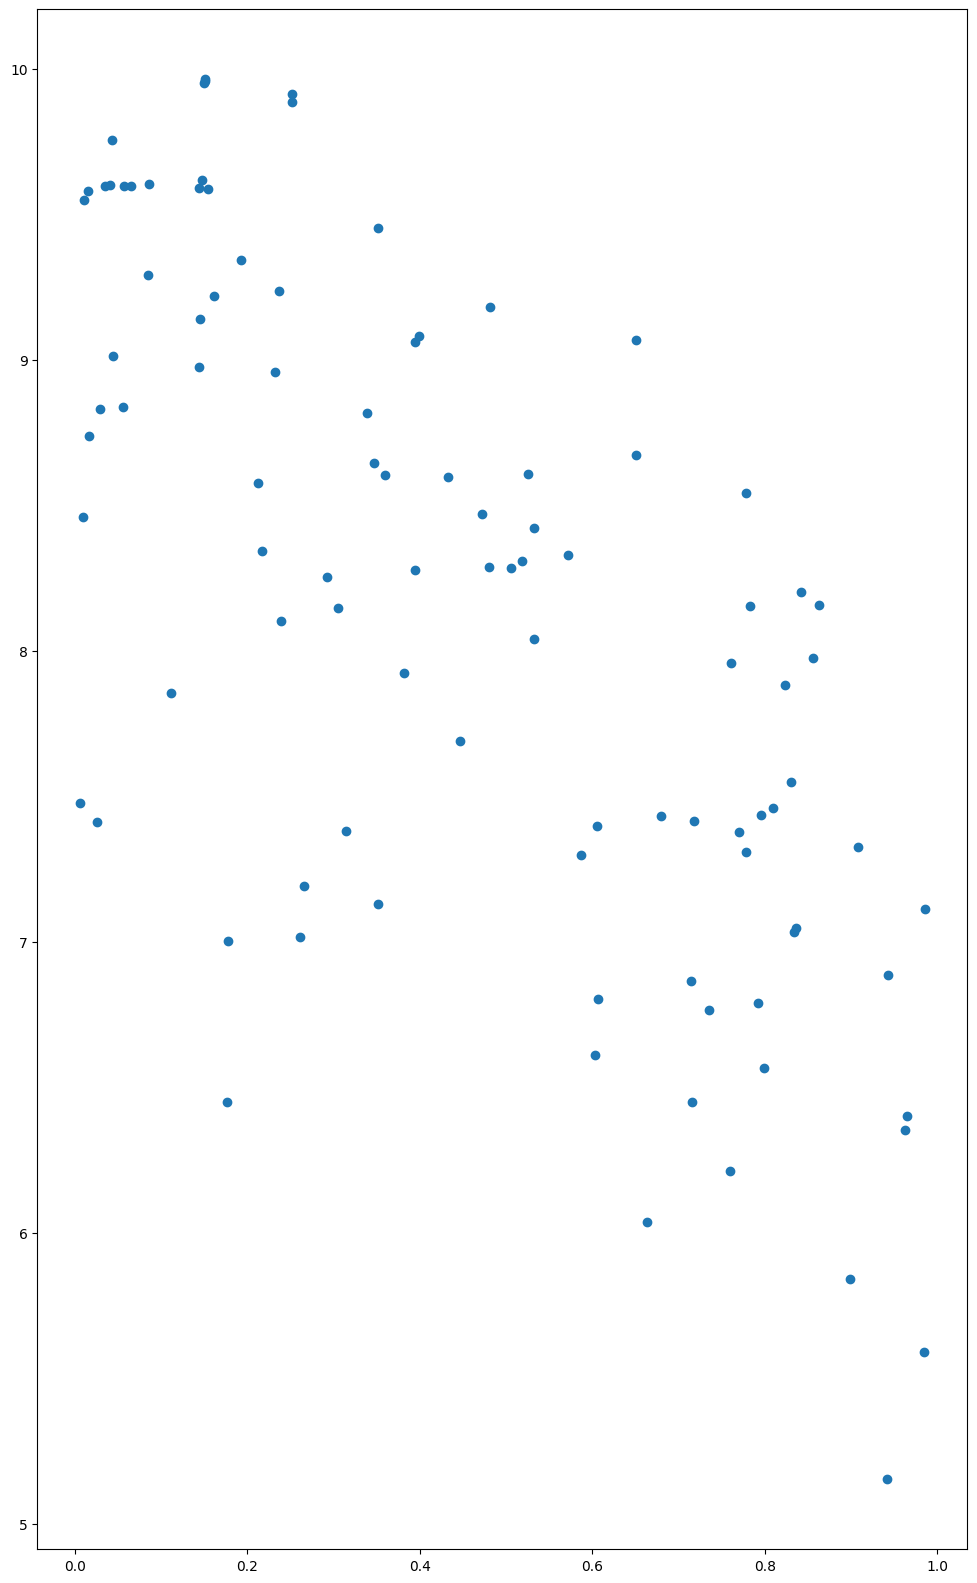

In [12]:
fig, ax = plt.subplots(1,1,figsize = (12,20))
ax.scatter(f8_inputs[:,0],f8_outputs)
#ax[1].scatter(f8_inputs[:,1],f8_outputs)
#ax[2].scatter(f8_inputs[:,2],f8_outputs)
#ax[3].scatter(f8_inputs[:,3],f8_outputs)
#ax[4].scatter(f8_inputs[:,4],f8_outputs)
#ax[5].scatter(f8_inputs[:,5],f8_outputs)
#ax[6].scatter(f8_inputs[:,6],f8_outputs)
#ax[7].scatter(f8_inputs[:,7],f8_outputs)

plt.show()

In [ ]:
np.savetxt("f8_inputs.csv", f8_inputs, delimiter=",")

In [ ]:
np.savetxt("f8_Outputs.csv", f8_outputs, delimiter=",")

In [ ]:
[0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544, 0.80105533, 0.48830701, 0.89308498]